# 데이터마이닝및실습 팀 과제 최종보고서

## 0. 팀원
- 김송하(컴퓨터전자시스템공학부, 202000715)
- 정민규(컴퓨터전자시스템공학부, 202003121)

## 1. 프로젝트 개요
### 목표
주어진 데이터 셋인 Wine Quality Dataset을 시각적으로 분석하여 fixed acidity, volatile acidity 등 다른 요소들과 quality간의 상관 관계를 분석하고 3개의 모델을 사용하여 두 가지 실험을 진행하여 다양한 품질 점수 카테고리로 분류한다. 이때, 세 가지 ML모델을 학습하고 어떤 모델이 가장 좋은 지 결정한다

### 실험 환경
실험은 총 2가지로 진행되었다. 모든 요소들을 사용해 quality를 예측하는 실험과 시각적 분석을 통해 quality와 상관관계가 높은(상관관계를 구하여 절댓값이 0.2보다 큰 상관 관계를 갖는) 요소들을 사용하여 quality를 예측하는 실험이다. 모든 실험은 아래와 같은 환경에서 진행되었다.
진행되었다.
- R 버전: 4.3.2 (2023-10-31)
- R 패키지 버전 : pROC_1.18.5, reshape2_1.4.4, MASS_7.3-60, MLmetrics_1.1.1, yardstick_1.2.0, caret_6.0-94, lattice_0.21-9, rpart_4.1.23, randomForest_4.7-1.1, e1071_1.7-14, corrplot_0.92, ggplot2_3.4.4, readr_2.1.4, dplyr_1.1.4

## 2. 프로젝트 과정
### 사용한 데이터 셋
- Wine Quality Dataset (WineQT): https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
    - Size: total data size: 1143
    - columns : 13 (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id)

### 사용한 모델
#### Support Vector Machines (SVM)
- 주어진 데이터가 어느 카테고리에 속할지 판단하는 이진 선형 분류 모델. 서포트 벡터들의거리인 마진의 최대치를 찾는 것이 svm의 목표이다.
- svm모델의 장점으로는 분류문제와 예측문제 동시에 쓸 수 있고, 신경망 기법에 비해 과적합 정도가 덜하고 예측의 정확도가 높다. 그리고 사용하기 쉽다.
- 이 모델의 단점으로는 kernel과 모델 파라미터를 조절하기 위한 테스트를 여러 번 해봐야 최적화된 모형을 만들 수 있고, 모형 구축 시간이 오래 걸린다. 또한 결과에 대한 설명력이 떨어진다는 단점이 있다.

#### Decision Trees
- decision tree란 입력값에 대한 예측값을 노드로 가지는 tree로 나타내어주는 모형.설명변수 간의 관계나 척도에 따라 목표변수를 예측하거나 분류하는 문제에 활용되는 트리 구조의 모델이다. 설명변수의 관측값을 모델에 입력해 목표변수를 분류하거나 예측하는 지도학습 기반의 방법론이다.
- 의사결정 트리 모델을 사용하는 주된 이유는 목표변수를 예측하거나 분류 문제를 해결함에 있어서 어떤 설명변수가 가장 중요한 영향인자인지 확인할 수 있고, 나아가 설명변수별로 어떤 척도에 따라 예측 또는 분류했는지 상세한 기준을 알 수 있다는 장점이 있다.

#### Random Forest
- 기존 decision tree의 이점을 살리고 Bagging변수를 랜덤으로 선택하는 과정을 추가함으로써 개별 노드들의 상관성을 줄여 예측력을 향상한 앙상블 모형. 램덤 포레스트는 램덤성에 의해 트리들이 서로 조금씩 다른 특성을 갖는 특성이 있다. 
- 이 특성은 각 트리들의 예측들이 비상관화 되게하며, 겨로가적으로 일반화 성능을 향상시키는 효과가 있다.

#### Logistic Regression
- 수학을 사용하여 두 데이터 요인 간의 관계를 찾는 데이터 분석 기법으로 두 데이터 간의 관계를 사용하여 다른 요인을 기반으로 이러한 요인 중 하나의 값을 예측한다. 예측은 일반적으로 유한한 수의 결과를 가진다. 
- 로지스틱 회귀는 간편성, 속도, 유연성, 가시성 부분에서 장점을 가진다.

In [1]:
# 필요한 패키지 설치 및 불러오기
# install.packages("dplyr")
# install.packages("readr")
# install.packages("ggplot2")
# install.packages("corrplot")
# install.packages("e1071")
# install.packages("randomForest")
# install.packages("rpart")
# install.packages("caret")
# install.packages("yardstick")
# install.packages("MLmetrics")
# install.packages("MASS")

library(dplyr)
library(readr)
library(ggplot2)
library(corrplot)
library(e1071)
library(randomForest)
library(rpart)
library(caret)
library(ggplot2)
library(corrplot)
library(caret)
library(e1071)
library(yardstick)
library(MLmetrics)
library(MASS)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


다음의 패키지를 부착합니다: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


필요한 패키지를 로딩중입니다: lattice


다음의 패키지를 부착합니다: ‘yardstick’


The following objects are masked from ‘package:caret’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:readr’:

    spec



다음의 패키지를 부착합니다: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall



다음의 패키지를 부착합니다: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [2]:
# 레드 와인 데이터 읽기
wine_red <- read_csv('/Users/kimsongha/Projects/2023-2/WineQT.csv', col_types = cols())

# 결측치 확인

In [3]:
# 전체 데이터 프레임에서 누락된 값이 있는지 확인
sum(is.na(wine_red))

[1] 0

# 데이터 확인

In [4]:
head(wine_red)

fixed acidity volatile acidity citric acid residual sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
6  7.4          0.66             0.00        1.8            0.075    
  free sulfur dioxide total sulfur dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
6 13                  40                   0.9978  3.51 0.56      9.4    
  quality Id
1 5       0 
2 5       1 
3 5       2 
4 6       3 
5 5       4 
6 5       5

In [5]:
names(wine_red)

[1] "fixed acidity"        "volatile acidity"     "citric acid"         
 [4] "residual sugar"       "chlorides"            "free sulfur dioxide" 
 [7] "total sulfur dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Id"

In [6]:
names(wine_red) <- gsub(" ", "_", names(wine_red))

In [7]:
names(wine_red)

[1] "fixed_acidity"        "volatile_acidity"     "citric_acid"         
 [4] "residual_sugar"       "chlorides"            "free_sulfur_dioxide" 
 [7] "total_sulfur_dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Id"

In [8]:
# 기본 정보 출력 함수 정의
info <- function(df) {
  # 데이터 프레임의 기본 구조
  print(str(df))

  # 각 열의 요약 정보
  sapply(df, function(x) {
    c(type = class(x), n_missing = sum(is.na(x)))
  })
}

# 함수 실행
info(wine_red)

spc_tbl_ [1,143 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ fixed_acidity       : num [1:1143] 7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile_acidity    : num [1:1143] 0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric_acid         : num [1:1143] 0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual_sugar      : num [1:1143] 1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num [1:1143] 0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free_sulfur_dioxide : num [1:1143] 11 25 15 17 11 13 15 15 9 15 ...
 $ total_sulfur_dioxide: num [1:1143] 34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num [1:1143] 0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num [1:1143] 3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num [1:1143] 0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num [1:1143] 9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ quality             : num 

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
type      numeric       numeric          numeric     numeric        numeric  
n_missing 0             0                0           0              0        
          free_sulfur_dioxide total_sulfur_dioxide density pH      sulphates
type      numeric             numeric              numeric numeric numeric  
n_missing 0                   0                    0       0       0        
          alcohol quality Id     
type      numeric numeric numeric
n_missing 0       0       0

# 이상치 확인 및 제거

In [9]:
# 이상치 제거 (Z-점수 기반)
z_scores <- as.data.frame(scale(wine_red))

# 모든 Z 점수가 표준 편차 3점 미만인 행 식별하기
filtered_entries <- apply(z_scores, 1, function(x) all(abs(x) < 3))

# 필터링된 값으로 새 데이터프레임 만들기
wine_new <- wine_red[filtered_entries, ]

In [10]:
wine_new_rows <- nrow(wine_new)

# 원본 데이터프레임에 있는 행의 수 확인
wine_rows <- nrow(wine_red)

# 데이터셋에서 줄어든 행의 수 계산
wine_reduction <- wine_rows - wine_new_rows

# 전체 행에서 줄어든 행의 백분율 계산
wine_reduction_percent <- (wine_reduction / wine_rows) * 100

# 결과 출력
cat(wine_reduction, "outliers have been removed from the wine_red dataset, which represents", round(wine_reduction_percent, 2), "% of the original dataset.")

102 outliers have been removed from the wine_red dataset, which represents 8.92 % of the original dataset.

In [11]:
# 원본 데이터 세트: 각 품질 등급에 대한 와인 개수 계산
wine_quality_counts <- table(wine_red$quality)
wine_quality_counts_sorted <- sort(wine_quality_counts)


# 원본 데이터 세트에 대해 정렬된 품질 개수 인쇄하기
cat("Original Dataset Quality Counts:\n")
print(wine_quality_counts_sorted)
cat("\nNumber of rows in original dataset:", nrow(wine_red), "\n")
cat("Number of columns in original dataset:", ncol(wine_red), "\n\n")

Original Dataset Quality Counts:

  3   8   4   7   6   5 
  6  16  33 143 462 483 

Number of rows in original dataset: 1143 
Number of columns in original dataset: 13 



In [12]:
# 필터링된 데이터 집합: 필터링된 데이터 집합에 대해 동일한 작업을 수행 (wine_new)
wine_new_quality_counts <- table(wine_new$quality)
wine_new_quality_counts_sorted <- sort(wine_new_quality_counts)

# 새 데이터 세트에 대해 정렬된 품질 카운트 인쇄하기
cat("Filtered Dataset Quality Counts:\n")
print(wine_new_quality_counts_sorted)
cat("\nNumber of rows in filtered dataset:", nrow(wine_new), "\n")
cat("Number of columns in filtered dataset:", ncol(wine_new), "\n")

Filtered Dataset Quality Counts:

  8   4   7   6   5 
 15  30 131 425 440 

Number of rows in filtered dataset: 1041 
Number of columns in filtered dataset: 13 


# 데이터 시각화 및 분석

In [13]:
# 상관 관계 계산
correlation_matrix <- cor(wine_new[, sapply(wine_red, is.numeric)])
print(correlation_matrix)

                     fixed_acidity volatile_acidity  citric_acid residual_sugar
fixed_acidity            1.0000000      -0.29604463  0.700352188     0.20696874
volatile_acidity        -0.2960446       1.00000000 -0.586476504     0.01226155
citric_acid              0.7003522      -0.58647650  1.000000000     0.21571330
residual_sugar           0.2069687       0.01226155  0.215713301     1.00000000
chlorides                0.1961650       0.08279813  0.107235020     0.09345136
free_sulfur_dioxide     -0.1577831       0.01778468 -0.074015963    -0.01924237
total_sulfur_dioxide    -0.1023435       0.11794992 -0.006489414     0.06346721
density                  0.6786199      -0.01950458  0.388885280     0.34321986
pH                      -0.7019710       0.23564764 -0.509549151    -0.07876993
sulphates                0.1961744      -0.36396298  0.307067099     0.05573806
alcohol                 -0.0235932      -0.20835754  0.168178046     0.19384165
quality                  0.1443043      

# Heat Map

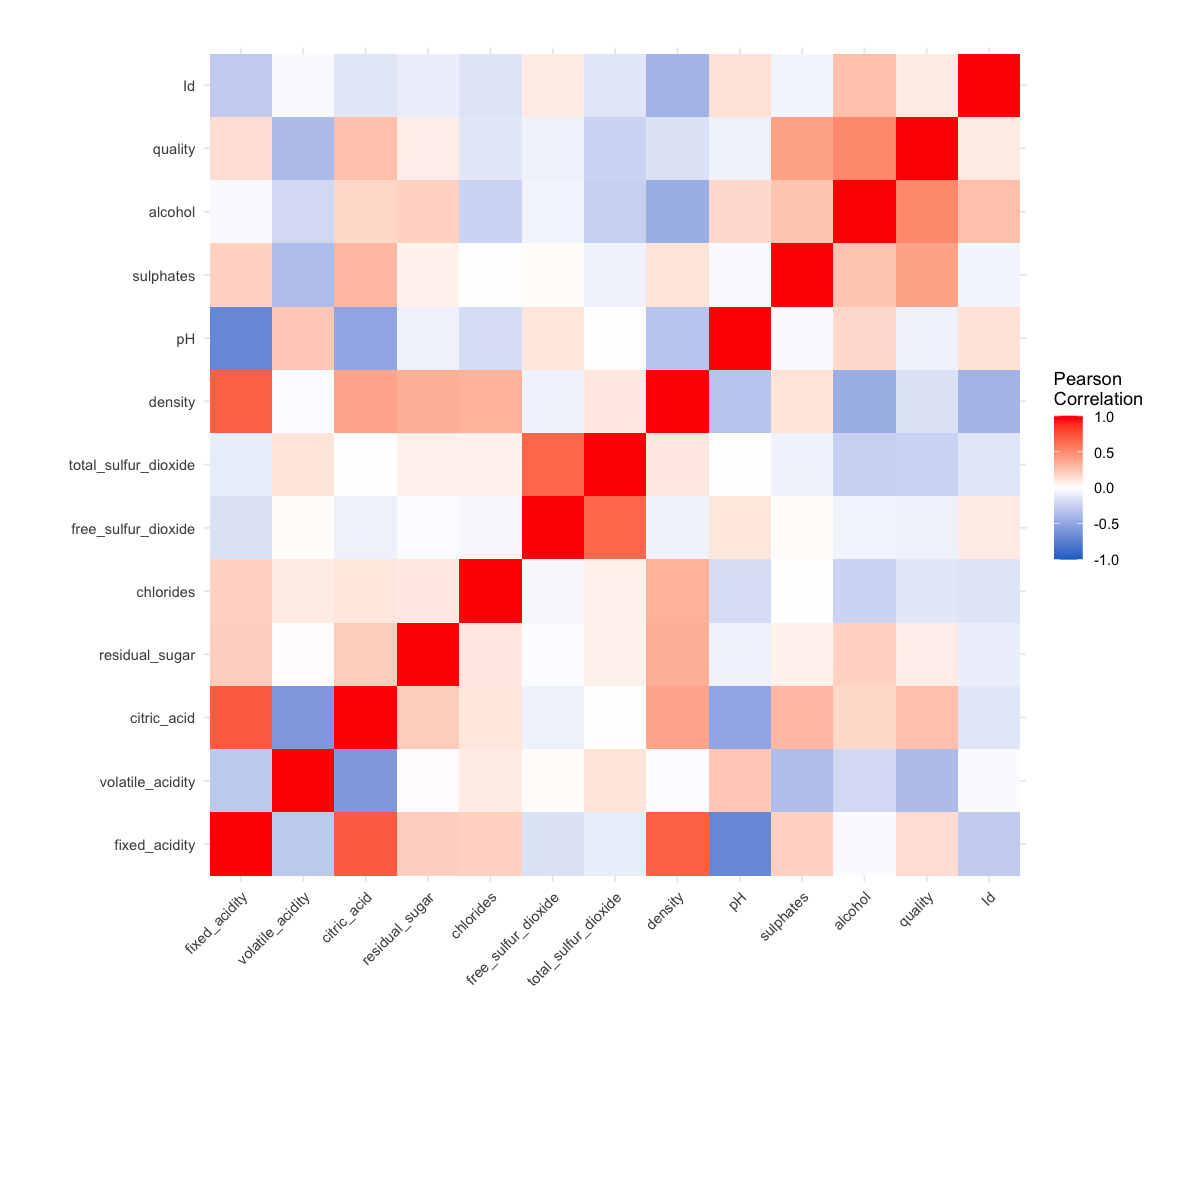

In [14]:
library(reshape2)
# 상관 관계 행렬을 긴 형태로 변환
correlation_melted <- melt(correlation_matrix)

# ggplot을 사용하여 히트맵 생성
options(repr.plot.width=10, repr.plot.height=10)
ggplot(correlation_melted, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "dodgerblue3", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.margin = unit(c(1, 1, 4, 1), "cm")) +  # 가로 길이 조정
  labs(x = '', y = '')

# Pair Plot

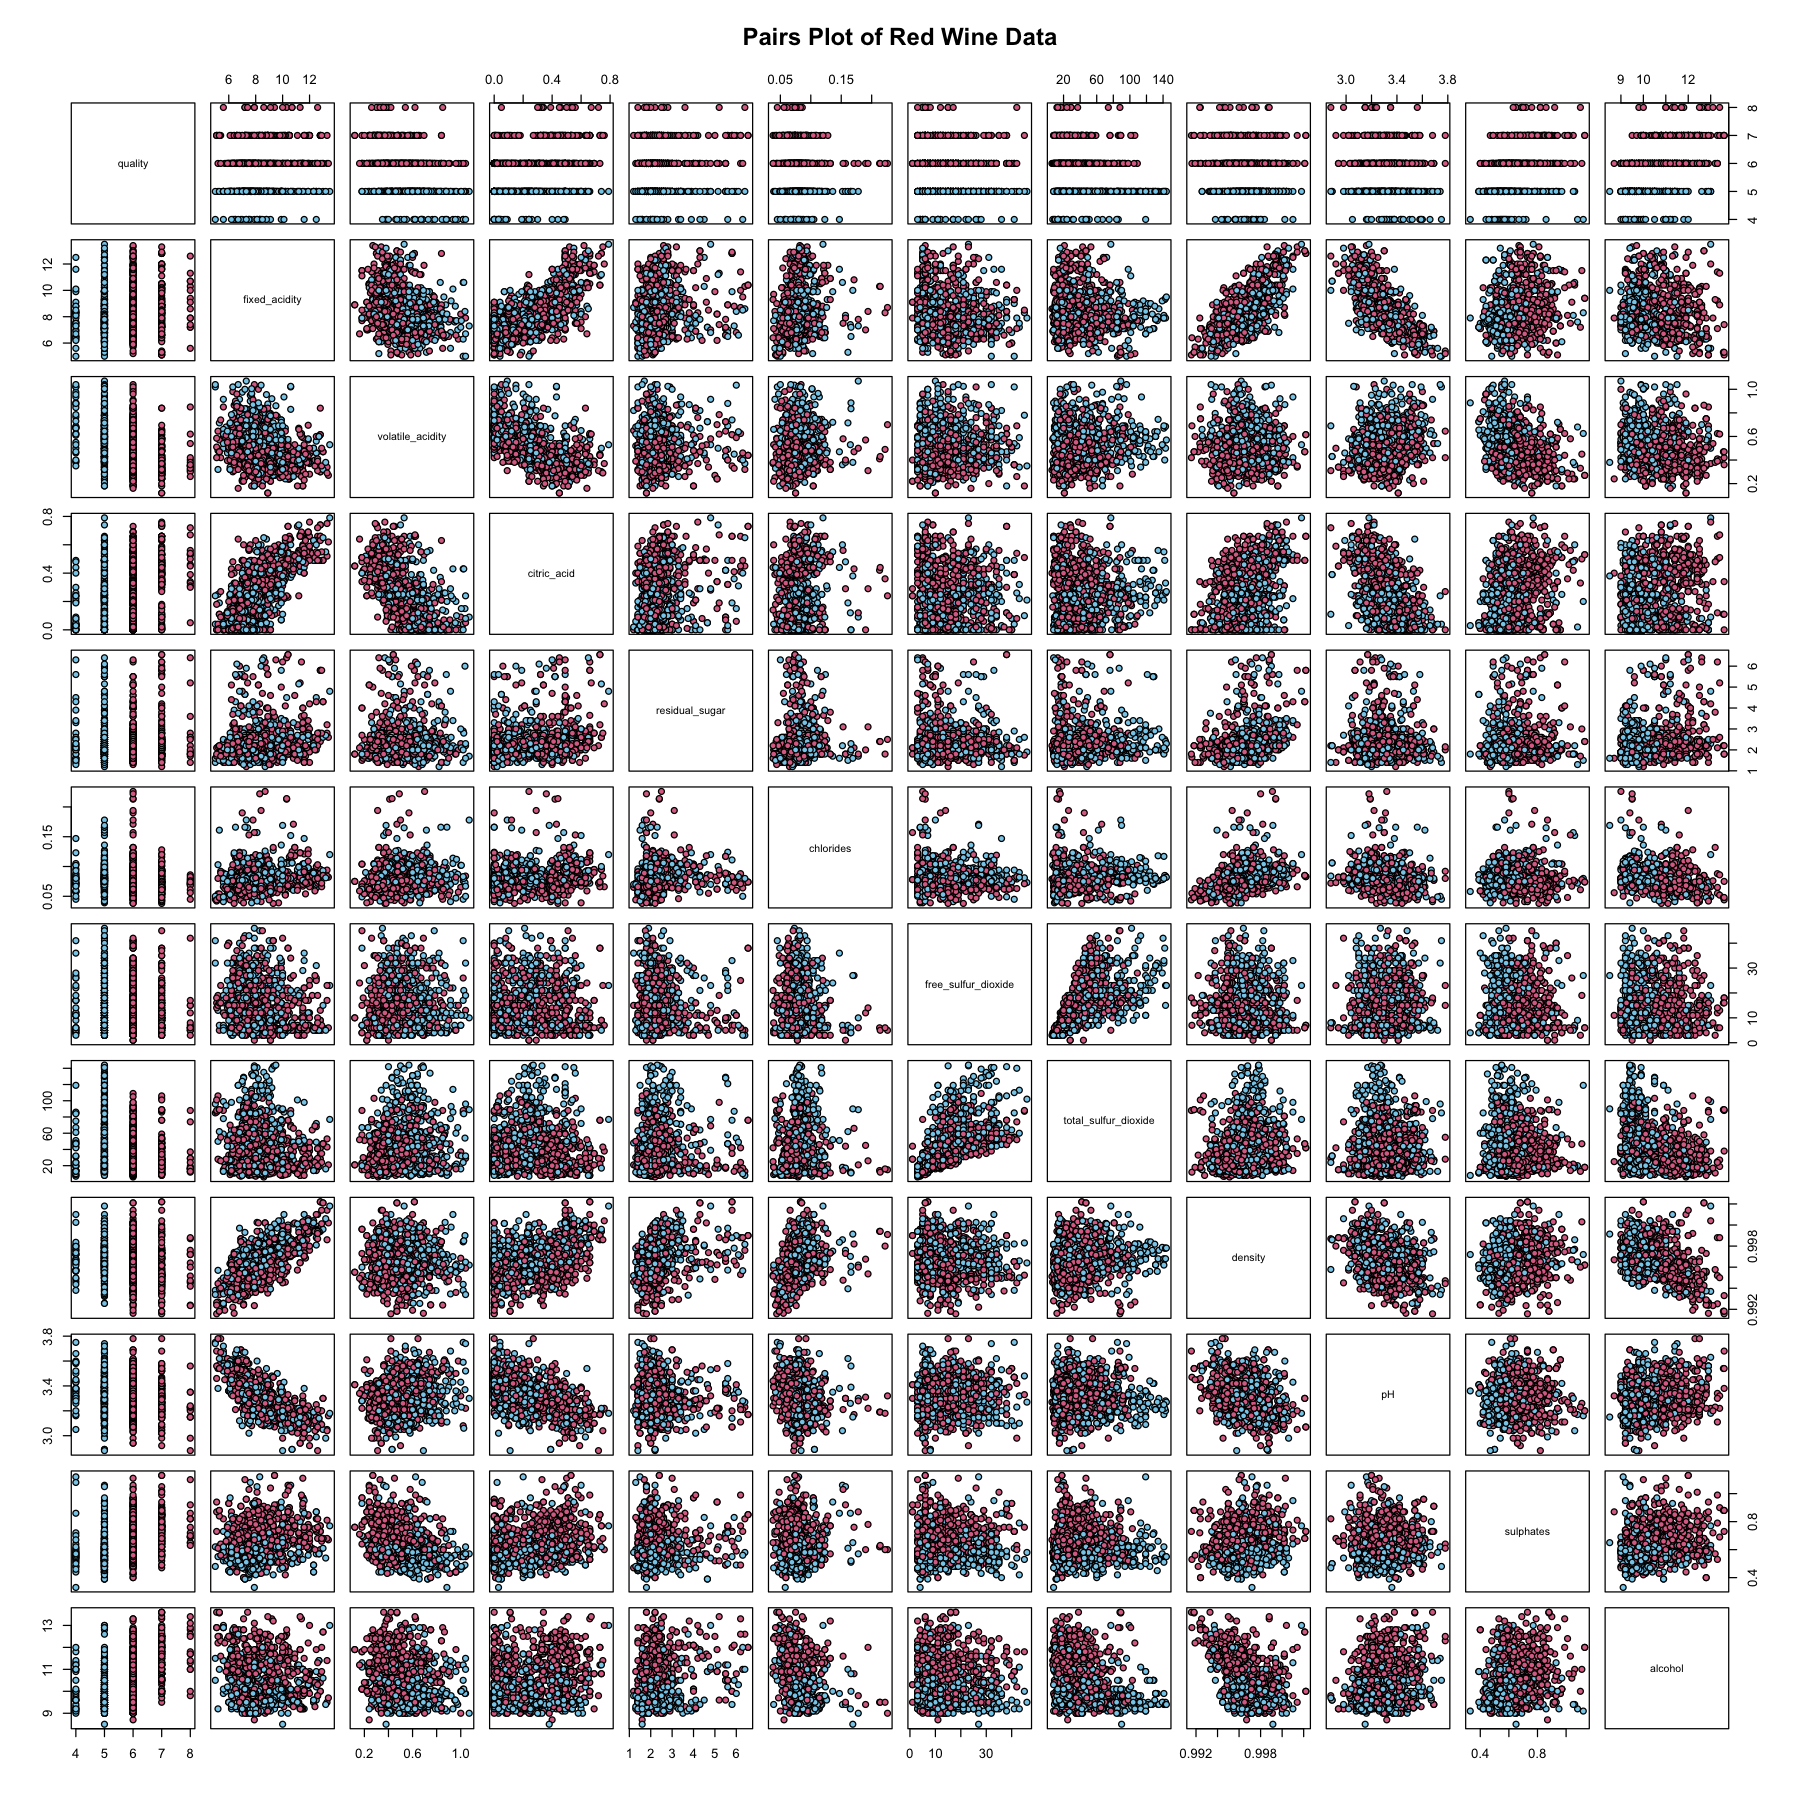

In [15]:
# 색상 벡터 생성
colors <- ifelse(wine_new$quality > 5, "palevioletred", "sky blue")

# 쌍별 플롯
options(repr.plot.width=15, repr.plot.height=15)
pairs(wine_new[,c('quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')], 
      main = "Pairs Plot of Red Wine Data",
      bg = colors, pch = 21)


# Box Plot

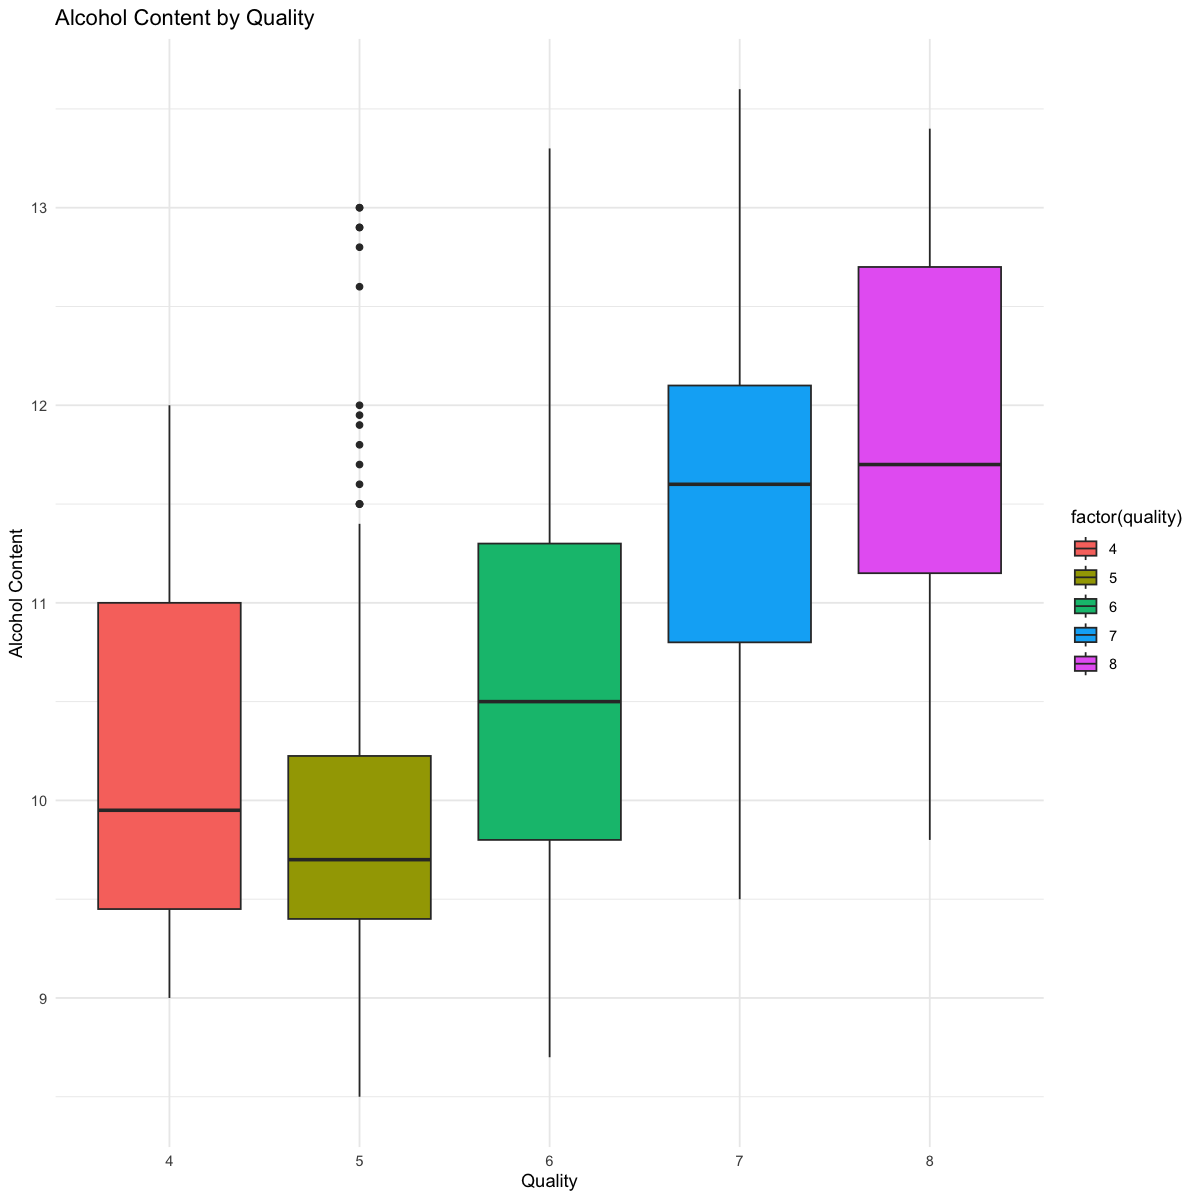

In [16]:
# 추가적인 시각화
# 퀄리티 별 알코올 함량 비교
options(repr.plot.width=10, repr.plot.height=10)
ggplot(wine_new, aes(x=factor(quality), y=alcohol, fill=factor(quality))) +
  geom_boxplot() +
  labs(title="Alcohol Content by Quality", x="Quality", y="Alcohol Content") +
  theme_minimal()

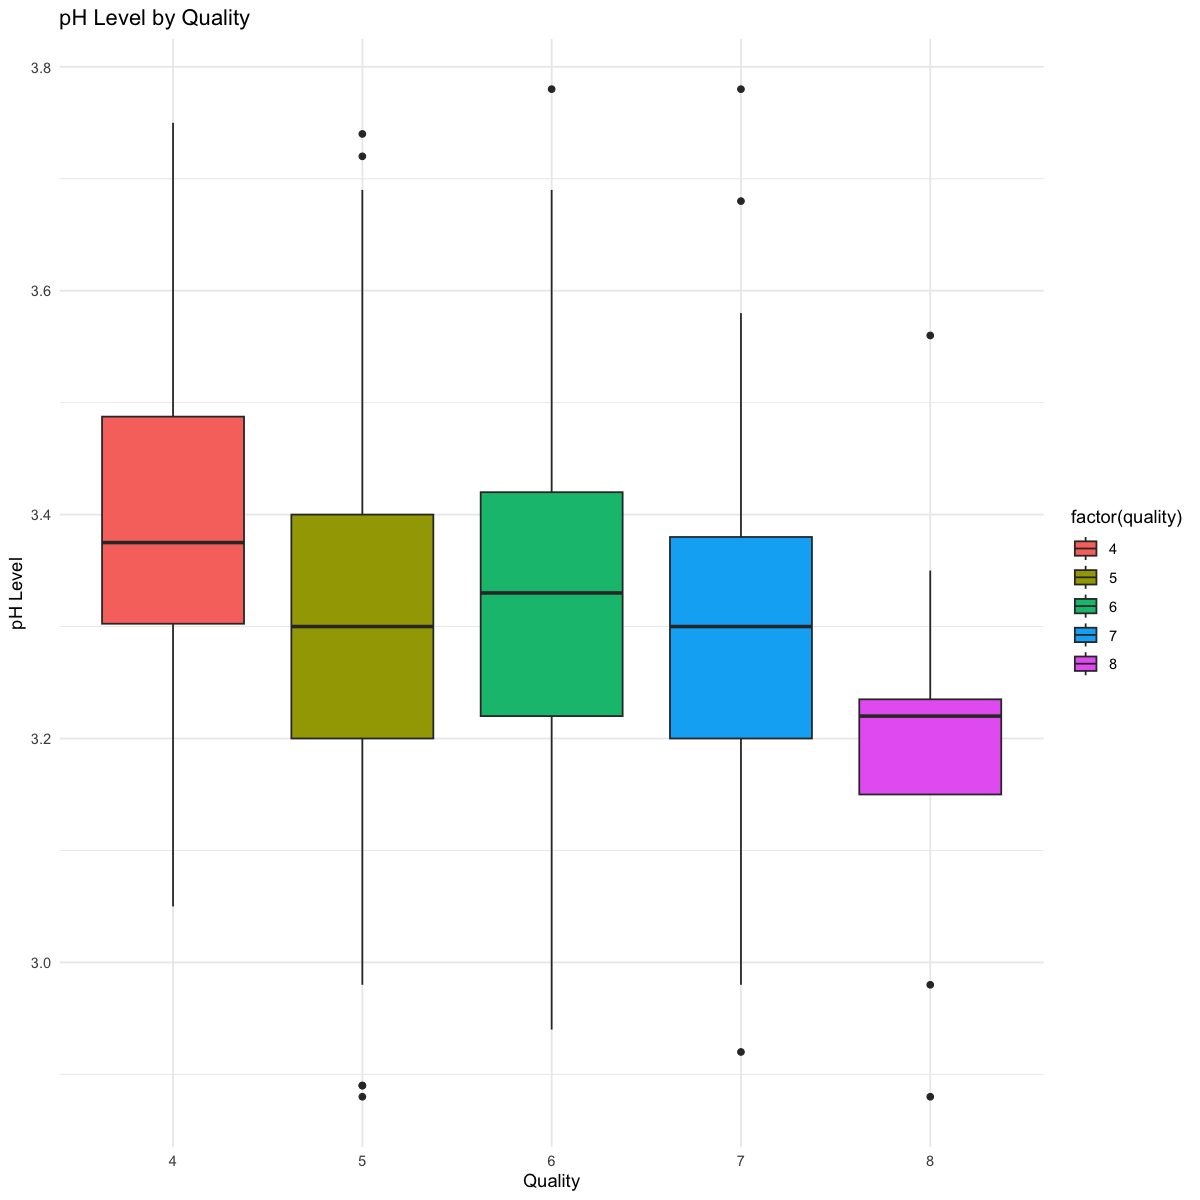

In [17]:
# 퀄리티 별 산도 비교
options(repr.plot.width=10, repr.plot.height=10)
ggplot(wine_new, aes(x=factor(quality), y=pH, fill=factor(quality))) +
  geom_boxplot() +
  labs(title="pH Level by Quality", x="Quality", y="pH Level") +
  theme_minimal()

# 전체 요소에 대한 모델 학습 및 평가

## Train, Test 데이터 분할 (7:3 비율)

In [18]:
# Trian, Test데이터 분할
X <- wine_new[, !(names(wine_new) %in% 'quality')]
y <- wine_new$quality

# Create training and test datasets
set.seed(123) # Setting a seed for reproducibility
splitIndex <- createDataPartition(y, p = 0.70, list = FALSE)
X_train <- X[splitIndex,]
y_train <- y[splitIndex]
X_test <- X[-splitIndex,]
y_test <- y[-splitIndex]

print(dim(wine_new))
print(dim(X_train))
print(dim(X_test))
print(length(y_train))
print(length(y_test))

[1] 1041   13
[1] 730  12
[1] 311  12
[1] 730
[1] 311


## SVM 모델 학습 및 평가

In [19]:
# SVM 모델
y_train <- as.factor(y_train)
model <- svm(y_train ~ ., data = X_train, probability = TRUE)
print(summary(model))


Call:
svm(formula = y_train ~ ., data = X_train, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  634

 ( 239 93 271 22 9 )


Number of Classes:  5 

Levels: 
 4 5 6 7 8





In [20]:
# 변환
predictions <- predict(model, X_test)
predictions_numeric <- as.numeric(levels(predictions))[predictions]

# 반올림
predictions_f <- as.factor(round(predictions_numeric))

# 혼동 행렬
y_test_f <- as.factor(y_test)
cm <- confusionMatrix(predictions_f, y_test_f)
print(cm)


Warning message in levels(reference) != levels(data):
“두 객체의 길이가 서로 배수관계에 있지 않습니다”
Warning message in confusionMatrix.default(predictions_f, y_test_f):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  4  5  6  7  8
         4  0  0  0  0  0
         5  6 94 33  2  0
         6  2 36 84 23  4
         7  0  3 10 12  2
         8  0  0  0  0  0

Overall Statistics
                                          
               Accuracy : 0.6109          
                 95% CI : (0.5543, 0.6654)
    No Information Rate : 0.4277          
    P-Value [Acc > NIR] : 6.203e-11       
                                          
                  Kappa : 0.3605          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000   0.7068   0.6614  0.32432  0.00000
Specificity           1.00000   0.7697   0.6467  0.94526  1.00000
Pos Pred Value            NaN   0.6963   0.5638  0.44444      NaN
Neg Pred Value        0.97428   0.7784   0.7346  0.91197  0.98071
Prevalence            0.02572  

In [21]:
# 혼동 행렬을 기반으로 정밀도, 재현율, F1 점수를 계산
metrics <- data.frame(
  class = rownames(cm$byClass),
  precision = cm$byClass[, "Precision"],
  recall = cm$byClass[, "Recall"],
  f1 = cm$byClass[, "F1"]
)

# 클래스를 기준으로 오름차순 정렬
metrics <- metrics[order(metrics$class), ]

rownames(metrics) <- NULL
metrics[is.na(metrics)] <- 0

# 결과를 출력합니다.
print(metrics, row.names = FALSE)

    class precision    recall        f1
 Class: 4 0.0000000 0.0000000 0.0000000
 Class: 5 0.6962963 0.7067669 0.7014925
 Class: 6 0.5637584 0.6614173 0.6086957
 Class: 7 0.4444444 0.3243243 0.3750000
 Class: 8 0.0000000 0.0000000 0.0000000


## 의사결정나무 모델 학습 및 평가

In [22]:
# 의사결정나무 모델
y_train <- as.factor(y_train)
dt_model <- rpart(y_train ~ ., data = X_train)
print(summary(dt_model))

Call:
rpart(formula = y_train ~ ., data = X_train)
  n= 730 

          CP nsplit rel error    xerror       xstd
1 0.25059102      0 1.0000000 1.0780142 0.03092829
2 0.02285264      1 0.7494090 0.7943262 0.03183581
3 0.01773050      4 0.6808511 0.7328605 0.03157212
4 0.01654846      6 0.6453901 0.7186761 0.03148762
5 0.01418440      9 0.5933806 0.7092199 0.03142629
6 0.01300236     10 0.5791962 0.7092199 0.03142629
7 0.01182033     12 0.5531915 0.7092199 0.03142629
8 0.01063830     13 0.5413712 0.6997636 0.03136093
9 0.01000000     15 0.5200946 0.7044917 0.03139411

Variable importance
             alcohol            sulphates total_sulfur_dioxide 
                  27                   18                   12 
             density     volatile_acidity          citric_acid 
                   9                    6                    6 
                  Id            chlorides        fixed_acidity 
                   5                    4                    4 
 free_sulfur_dioxide   

In [23]:
# 예측
predictions_dt <- predict(dt_model, X_test, type = "class")
y_test_f <- as.factor(y_test)

cm <- confusionMatrix(predictions_dt, y_test_f)
print(cm)

Confusion Matrix and Statistics

          Reference
Prediction  4  5  6  7  8
         4  0  0  0  0  0
         5  4 82 36  1  0
         6  4 48 78 27  5
         7  0  3 13  9  1
         8  0  0  0  0  0

Overall Statistics
                                          
               Accuracy : 0.5434          
                 95% CI : (0.4863, 0.5997)
    No Information Rate : 0.4277          
    P-Value [Acc > NIR] : 2.637e-05       
                                          
                  Kappa : 0.2493          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000   0.6165   0.6142  0.24324  0.00000
Specificity           1.00000   0.7697   0.5435  0.93796  1.00000
Pos Pred Value            NaN   0.6667   0.4815  0.34615      NaN
Neg Pred Value        0.97428   0.7287   0.6711  0.90175  0.98071
Prevalence            0.02572  

In [24]:
# 혼동 행렬을 기반으로 정밀도, 재현율, F1 점수를 계산
metrics <- data.frame(
  class = rownames(cm$byClass),
  precision = cm$byClass[, "Precision"],
  recall = cm$byClass[, "Recall"],
  f1 = cm$byClass[, "F1"]
)

# 클래스를 기준으로 오름차순 정렬
metrics <- metrics[order(metrics$class), ]

rownames(metrics) <- NULL
metrics[is.na(metrics)] <- 0

# 결과를 출력합니다.
print(metrics, row.names = FALSE)

    class precision    recall        f1
 Class: 4 0.0000000 0.0000000 0.0000000
 Class: 5 0.6666667 0.6165414 0.6406250
 Class: 6 0.4814815 0.6141732 0.5397924
 Class: 7 0.3461538 0.2432432 0.2857143
 Class: 8 0.0000000 0.0000000 0.0000000


## 랜덤포레스트 모델 학습 및 평가

In [25]:
# 랜덤포레스트 모델
y_train <- as.factor(y_train)
rf_model <- randomForest(y_train ~ ., data = X_train)
print(summary(rf_model))

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted        730   factor numeric  
err.rate        3000   -none- numeric  
confusion         30   -none- numeric  
votes           3650   matrix numeric  
oob.times        730   -none- numeric  
classes            5   -none- character
importance        12   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                730   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     


In [26]:
# 예측
predictions_rf <- predict(rf_model, X_test)
predictions_rf_num <- as.numeric(as.character(predictions_rf))
predictions_rf_f <- as.factor(round(predictions_rf_num))
y_test_f <- as.factor(y_test)


cm <- confusionMatrix(predictions_rf_f, y_test_f)
print(cm)

Warning message in levels(reference) != levels(data):
“두 객체의 길이가 서로 배수관계에 있지 않습니다”
Warning message in confusionMatrix.default(predictions_rf_f, y_test_f):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  4  5  6  7  8
         4  0  0  0  0  0
         5  6 98 31  2  0
         6  2 35 86 20  4
         7  0  0 10 15  1
         8  0  0  0  0  1

Overall Statistics
                                          
               Accuracy : 0.6431          
                 95% CI : (0.5871, 0.6964)
    No Information Rate : 0.4277          
    P-Value [Acc > NIR] : 1.706e-14       
                                          
                  Kappa : 0.4135          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000   0.7368   0.6772  0.40541 0.166667
Specificity           1.00000   0.7809   0.6685  0.95985 1.000000
Pos Pred Value            NaN   0.7153   0.5850  0.57692 1.000000
Neg Pred Value        0.97428   0.7989   0.7500  0.92281 0.983871
Prevalence            0.02572  

In [27]:
# 혼동 행렬을 기반으로 정밀도, 재현율, F1 점수를 계산
metrics <- data.frame(
  class = rownames(cm$byClass),
  precision = cm$byClass[, "Precision"],
  recall = cm$byClass[, "Recall"],
  f1 = cm$byClass[, "F1"]
)

# 클래스를 기준으로 오름차순 정렬
metrics <- metrics[order(metrics$class), ]

rownames(metrics) <- NULL
metrics[is.na(metrics)] <- 0

# 결과를 출력합니다.
print(metrics, row.names = FALSE)

    class precision    recall        f1
 Class: 4 0.0000000 0.0000000 0.0000000
 Class: 5 0.7153285 0.7368421 0.7259259
 Class: 6 0.5850340 0.6771654 0.6277372
 Class: 7 0.5769231 0.4054054 0.4761905
 Class: 8 1.0000000 0.1666667 0.2857143


## 머신러닝 모형과 로지스틱 회귀모형 기반의 평점표

In [28]:
# SVM
svm_pred <- predict(model, X_test, type = "class")
svm_acc <- sum(svm_pred == y_test) / length(y_test)

# Decision Tree
dt_pred <- predict(dt_model, X_test, type = "class")
dt_acc <- sum(dt_pred == y_test) / length(y_test)

# Random Forest
rf_pred <- predict(rf_model, X_test, type = "class")
rf_acc <- sum(rf_pred == y_test) / length(y_test)

# Ordinal Logistic Regression
ordinal_model <- polr(as.ordered(y_train) ~ ., data = X_train, Hess=TRUE)
ordinal_pred <- predict(ordinal_model , X_test, type = "class")
ordinal_acc <- sum(ordinal_pred == y_test) / length(y_test)

# 결과 출력
cat("SVM Accuracy: ", svm_acc, "\n")
cat("Decision Tree Accuracy: ", dt_acc, "\n")
cat("Random Forest Accuracy: ", rf_acc, "\n")
cat("Ordinal Logistic Regression Accuracy: ", ordinal_acc, "\n")


SVM Accuracy:  0.6109325 
Decision Tree Accuracy:  0.5434084 
Random Forest Accuracy:  0.6430868 
Ordinal Logistic Regression Accuracy:  0.6012862 


## 모형들 간의 AUROC 비교
- 본 프로젝트에서 사용한 모델이 이진 분류 모델이 아닌 다중 분류 모델이므로 AUROC도 다중 클래스 모델에 대한 분석을 진행함

In [29]:
# 필요한 패키지 로드
library(pROC)

# 각 모델에 대한 예측 확률 계산
svm_prob <- predict(model, X_test, probability = TRUE)
dt_prob <- predict(dt_model, X_test, type = "prob")
rf_prob <- predict(rf_model, X_test, type = "prob")

svm_probabilities <- attr(svm_prob, "probabilities")
ordinal_prob <- predict(ordinal_model, X_test, type="probs")

# 각 모델과 클래스에 대한 AUROC 계산
svm_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_index <- which(colnames(svm_probabilities) == class)
    class_prob <- svm_probabilities[, class_index]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

dt_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_prob = dt_prob[,class]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

rf_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_prob = rf_prob[,class]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

ordinal_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_prob = ordinal_prob[,class]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

# 각 모델에 대한 AUROC 출력
cat("[ SVM AUROC ]\n")
for (i in seq_along(svm_rocs)) {
  cat("SVM AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(svm_rocs[[i]]), "\n")
}
cat("\n[ Decision Tree AUROC ]\n")
for (i in seq_along(dt_rocs)) {
  cat("Decision Tree AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(dt_rocs[[i]]), "\n")
}
cat("\n[ Random Forest AUROC ]\n")
for (i in seq_along(rf_rocs)) {
  cat("Random Forest AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(rf_rocs[[i]]), "\n")
}
cat("\n[ Ordinal Logistic Regression AUROC ]\n")
for (i in seq_along(ordinal_rocs)) {
  cat("Ordinal Logistic Regression AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(ordinal_rocs[[i]]), "\n")
}

Type 'citation("pROC")' for a citation.


다음의 패키지를 부착합니다: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases



[ SVM AUROC ]
SVM AUROC for class  4 :  0.7801155 
SVM AUROC for class  5 :  0.7949227 
SVM AUROC for class  6 :  0.6955238 
SVM AUROC for class  7 :  0.8758138 
SVM AUROC for class  8 :  0.8754098 

[ Decision Tree AUROC ]
Decision Tree AUROC for class  4 :  0.615099 
Decision Tree AUROC for class  5 :  0.7746684 
Decision Tree AUROC for class  6 :  0.6252782 
Decision Tree AUROC for class  7 :  0.796015 
Decision Tree AUROC for class  8 :  0.8295082 

[ Random Forest AUROC ]
Random Forest AUROC for class  4 :  0.7689769 
Random Forest AUROC for class  5 :  0.8386838 
Random Forest AUROC for class  6 :  0.7344231 
Random Forest AUROC for class  7 :  0.8816335 
Random Forest AUROC for class  8 :  0.8527322 

[ Ordinal Logistic Regression AUROC ]
Ordinal Logistic Regression AUROC for class  4 :  0.6716172 
Ordinal Logistic Regression AUROC for class  5 :  0.8186618 
Ordinal Logistic Regression AUROC for class  6 :  0.6928278 
Ordinal Logistic Regression AUROC for class  7 :  0.8663444 


# 상관관계가 높은 5개 요소에 대한 모델 학습 및 평가
- 데이터를 시각적 및 수치로 비교한 결과를 확인하여 quality와 상관관계가 높게 나온 아래 5가지 요소만 사용해서 데이터 분석을 진행함
    - "volatile_acidity"
    - "citric_acid"
    - "total_sulfur_dioxide"
    - "sulphates"
    - "alcohol"

## Train, Test 데이터 분할 (7:3 비율)

In [30]:
X <- wine_new[, c("volatile_acidity", "citric_acid", "total_sulfur_dioxide", "sulphates", "alcohol")]
y <- wine_new$quality

# Create training and test datasets
set.seed(123) # Setting a seed for reproducibility
splitIndex <- createDataPartition(y, p = 0.70, list = FALSE)
X_train <- X[splitIndex,]
y_train <- y[splitIndex]
X_test <- X[-splitIndex,]
y_test <- y[-splitIndex]

print(dim(X_train))
print(dim(X_test))
print(length(y_train))
print(length(y_test))

[1] 730   5
[1] 311   5
[1] 730
[1] 311


## SVM 모델 학습 및 평가

In [31]:
# SVM 모델
y_train <- as.factor(y_train)
model <- svm(y_train ~ ., data = X_train, probability = TRUE)
print(summary(model))


Call:
svm(formula = y_train ~ ., data = X_train, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  589

 ( 218 88 252 22 9 )


Number of Classes:  5 

Levels: 
 4 5 6 7 8





In [32]:
# 변환
predictions_numeric <- as.numeric(levels(predictions))[predictions]

# 반올림
predictions_f <- as.factor(round(predictions_numeric))

# 혼동 행렬
cm <- confusionMatrix(predictions_f, y_test_f)
print(cm)


Warning message in levels(reference) != levels(data):
“두 객체의 길이가 서로 배수관계에 있지 않습니다”
Warning message in confusionMatrix.default(predictions_f, y_test_f):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  4  5  6  7  8
         4  0  0  0  0  0
         5  6 94 33  2  0
         6  2 36 84 23  4
         7  0  3 10 12  2
         8  0  0  0  0  0

Overall Statistics
                                          
               Accuracy : 0.6109          
                 95% CI : (0.5543, 0.6654)
    No Information Rate : 0.4277          
    P-Value [Acc > NIR] : 6.203e-11       
                                          
                  Kappa : 0.3605          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000   0.7068   0.6614  0.32432  0.00000
Specificity           1.00000   0.7697   0.6467  0.94526  1.00000
Pos Pred Value            NaN   0.6963   0.5638  0.44444      NaN
Neg Pred Value        0.97428   0.7784   0.7346  0.91197  0.98071
Prevalence            0.02572  

In [33]:
# 혼동 행렬을 기반으로 정밀도, 재현율, F1 점수를 계산
metrics <- data.frame(
  class = rownames(cm$byClass),
  precision = cm$byClass[, "Precision"],
  recall = cm$byClass[, "Recall"],
  f1 = cm$byClass[, "F1"]
)

# 클래스를 기준으로 오름차순 정렬
metrics <- metrics[order(metrics$class), ]

rownames(metrics) <- NULL
metrics[is.na(metrics)] <- 0

# 결과를 출력합니다.
print(metrics, row.names = FALSE)

    class precision    recall        f1
 Class: 4 0.0000000 0.0000000 0.0000000
 Class: 5 0.6962963 0.7067669 0.7014925
 Class: 6 0.5637584 0.6614173 0.6086957
 Class: 7 0.4444444 0.3243243 0.3750000
 Class: 8 0.0000000 0.0000000 0.0000000


## 의사결정나무 모델 학습 및 평가

In [34]:
# 의사결정나무 모델
y_train <- as.factor(y_train)
dt_model <- rpart(y_train ~ ., data = X_train)
print(summary(dt_model))

Call:
rpart(formula = y_train ~ ., data = X_train)
  n= 730 

          CP nsplit rel error    xerror       xstd
1 0.25059102      0 1.0000000 1.0780142 0.03092829
2 0.02285264      1 0.7494090 0.7943262 0.03183581
3 0.01418440      4 0.6808511 0.7139480 0.03145745
4 0.01182033      6 0.6524823 0.7257683 0.03153099
5 0.01000000     15 0.5437352 0.7139480 0.03145745

Variable importance
             alcohol            sulphates total_sulfur_dioxide 
                  39                   23                   15 
         citric_acid     volatile_acidity 
                  13                   11 

Node number 1: 730 observations,    complexity param=0.250591
  predicted class=5  expected loss=0.5794521  P(node) =1
    class counts:    22   307   298    94     9
   probabilities: 0.030 0.421 0.408 0.129 0.012 
  left son=2 (289 obs) right son=3 (441 obs)
  Primary splits:
      alcohol              < 9.85   to the left,  improve=46.77350, (0 missing)
      sulphates            < 0.625  t

In [35]:
# 예측
predictions_dt <- predict(dt_model, X_test, type = "class")
y_test_f <- as.factor(y_test)

cm <- confusionMatrix(predictions_dt, y_test_f)
print(cm)

Confusion Matrix and Statistics

          Reference
Prediction  4  5  6  7  8
         4  0  0  0  0  0
         5  4 91 44  4  0
         6  4 42 71 23  5
         7  0  0 12 10  1
         8  0  0  0  0  0

Overall Statistics
                                          
               Accuracy : 0.5531          
                 95% CI : (0.4959, 0.6092)
    No Information Rate : 0.4277          
    P-Value [Acc > NIR] : 5.829e-06       
                                          
                  Kappa : 0.2602          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000   0.6842   0.5591  0.27027  0.00000
Specificity           1.00000   0.7079   0.5978  0.95255  1.00000
Pos Pred Value            NaN   0.6364   0.4897  0.43478      NaN
Neg Pred Value        0.97428   0.7500   0.6627  0.90625  0.98071
Prevalence            0.02572  

In [36]:
# 혼동 행렬을 기반으로 정밀도, 재현율, F1 점수를 계산
metrics <- data.frame(
  class = rownames(cm$byClass),
  precision = cm$byClass[, "Precision"],
  recall = cm$byClass[, "Recall"],
  f1 = cm$byClass[, "F1"]
)

# 클래스를 기준으로 오름차순 정렬
metrics <- metrics[order(metrics$class), ]

rownames(metrics) <- NULL
metrics[is.na(metrics)] <- 0

# 결과를 출력합니다.
print(metrics, row.names = FALSE)

    class precision    recall        f1
 Class: 4 0.0000000 0.0000000 0.0000000
 Class: 5 0.6363636 0.6842105 0.6594203
 Class: 6 0.4896552 0.5590551 0.5220588
 Class: 7 0.4347826 0.2702703 0.3333333
 Class: 8 0.0000000 0.0000000 0.0000000


## 랜덤포레스트 모델 학습 및 평가

In [37]:
# 랜덤 포레스트 모델
y_train <- as.factor(y_train)
rf_model <- randomForest(y_train ~ ., data = X_train)
print(summary(rf_model))

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted        730   factor numeric  
err.rate        3000   -none- numeric  
confusion         30   -none- numeric  
votes           3650   matrix numeric  
oob.times        730   -none- numeric  
classes            5   -none- character
importance         5   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                730   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     


In [38]:
# 예측
predictions_rf <- predict(rf_model, X_test)
predictions_rf_num <- as.numeric(as.character(predictions_rf))
predictions_rf_f <- as.factor(round(predictions_rf_num))
y_test_f <- as.factor(y_test)


cm <- confusionMatrix(predictions_rf_f, y_test_f)
print(cm)

Warning message in levels(reference) != levels(data):
“두 객체의 길이가 서로 배수관계에 있지 않습니다”
Warning message in confusionMatrix.default(predictions_rf_f, y_test_f):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  4  5  6  7  8
         4  0  0  0  0  0
         5  3 90 32  3  0
         6  5 43 82 18  3
         7  0  0 13 16  2
         8  0  0  0  0  1

Overall Statistics
                                         
               Accuracy : 0.6077         
                 95% CI : (0.551, 0.6623)
    No Information Rate : 0.4277         
    P-Value [Acc > NIR] : 1.308e-10      
                                         
                  Kappa : 0.3609         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000   0.6767   0.6457  0.43243 0.166667
Specificity           1.00000   0.7865   0.6250  0.94526 1.000000
Pos Pred Value            NaN   0.7031   0.5430  0.51613 1.000000
Neg Pred Value        0.97428   0.7650   0.7188  0.92500 0.983871
Prevalence            0.02572   0.4277  

In [39]:
# 혼동 행렬을 기반으로 정밀도, 재현율, F1 점수를 계산
metrics <- data.frame(
  class = rownames(cm$byClass),
  precision = cm$byClass[, "Precision"],
  recall = cm$byClass[, "Recall"],
  f1 = cm$byClass[, "F1"]
)

# 클래스를 기준으로 오름차순 정렬
metrics <- metrics[order(metrics$class), ]

rownames(metrics) <- NULL
metrics[is.na(metrics)] <- 0

# 결과를 출력합니다.
print(metrics, row.names = FALSE)

    class precision    recall        f1
 Class: 4 0.0000000 0.0000000 0.0000000
 Class: 5 0.7031250 0.6766917 0.6896552
 Class: 6 0.5430464 0.6456693 0.5899281
 Class: 7 0.5161290 0.4324324 0.4705882
 Class: 8 1.0000000 0.1666667 0.2857143


## 머신러닝 모형과 로지스틱 회귀모형 기반의 평점표

In [40]:
# SVM
svm_pred <- predict(model, X_test, type = "class")
svm_acc <- sum(svm_pred == y_test) / length(y_test)

# Decision Tree
dt_pred <- predict(dt_model, X_test, type = "class")
dt_acc <- sum(dt_pred == y_test) / length(y_test)

# Random Forest
rf_pred <- predict(rf_model, X_test, type = "class")
rf_acc <- sum(rf_pred == y_test) / length(y_test)

# Ordinal Logistic Regression
ordinal_model <- polr(as.ordered(y_train) ~ ., data = X_train, Hess=TRUE)
ordinal_pred <- predict(ordinal_model , X_test, type = "class")
ordinal_acc <- sum(ordinal_pred == y_test) / length(y_test)

# 결과 출력
cat("SVM Accuracy: ", svm_acc, "\n")
cat("Decision Tree Accuracy: ", dt_acc, "\n")
cat("Random Forest Accuracy: ", rf_acc, "\n")
cat("Ordinal Logistic Regression Accuracy: ", ordinal_acc, "\n")


SVM Accuracy:  0.5948553 
Decision Tree Accuracy:  0.5530547 
Random Forest Accuracy:  0.607717 
Ordinal Logistic Regression Accuracy:  0.6109325 


## 모형들 간의 AUROC 비교
- 본 프로젝트에서 사용한 모델이 이진 분류 모델이 아닌 다중 분류 모델이므로 AUROC도 다중 클래스 모델에 대한 분석을 진행함

In [41]:
# 필요한 패키지 로드
library(pROC)

# 각 모델에 대한 예측 확률 계산
svm_prob <- predict(model, X_test, probability = TRUE)
dt_prob <- predict(dt_model, X_test, type = "prob")
rf_prob <- predict(rf_model, X_test, type = "prob")

svm_probabilities <- attr(svm_prob, "probabilities")
ordinal_prob <- predict(ordinal_model, X_test, type="probs")

# 각 모델과 클래스에 대한 AUROC 계산
svm_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_index <- which(colnames(svm_probabilities) == class)
    class_prob <- svm_probabilities[, class_index]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

dt_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_prob = dt_prob[,class]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

rf_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_prob = rf_prob[,class]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

ordinal_rocs <- lapply(levels(as.factor(y_test)), function(class) {
  if(sum(y_test == class) > 0){
    class_prob = ordinal_prob[,class]
    response = as.integer(y_test == class)
    roc_obj = multiclass.roc(response = response, predictor = class_prob)
    return(roc_obj)
  }
  else{
    return(NULL)
  }
})

# 각 모델에 대한 AUROC 출력
cat("[ SVM AUROC ]\n")
for (i in seq_along(svm_rocs)) {
  cat("SVM AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(svm_rocs[[i]]), "\n")
}
cat("\n[ Decision Tree AUROC ]\n")
for (i in seq_along(dt_rocs)) {
  cat("Decision Tree AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(dt_rocs[[i]]), "\n")
}
cat("\n[ Random Forest AUROC ]\n")
for (i in seq_along(rf_rocs)) {
  cat("Random Forest AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(rf_rocs[[i]]), "\n")
}
cat("\n[ Ordinal Logistic Regression AUROC ]\n")
for (i in seq_along(ordinal_rocs)) {
  cat("Ordinal Logistic Regression AUROC for class ", levels(as.factor(y_test))[i], ": ", 
      auc(ordinal_rocs[[i]]), "\n")
}

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases



[ SVM AUROC ]
SVM AUROC for class  4 :  0.7838284 
SVM AUROC for class  5 :  0.8073836 
SVM AUROC for class  6 :  0.6907309 
SVM AUROC for class  7 :  0.845433 
SVM AUROC for class  8 :  0.8939891 

[ Decision Tree AUROC ]
Decision Tree AUROC for class  4 :  0.7192657 
Decision Tree AUROC for class  5 :  0.768628 
Decision Tree AUROC for class  6 :  0.6219403 
Decision Tree AUROC for class  7 :  0.8131288 
Decision Tree AUROC for class  8 :  0.8237705 

[ Random Forest AUROC ]
Random Forest AUROC for class  4 :  0.6984323 
Random Forest AUROC for class  5 :  0.8191898 
Random Forest AUROC for class  6 :  0.7095815 
Random Forest AUROC for class  7 :  0.8747287 
Random Forest AUROC for class  8 :  0.9076503 

[ Ordinal Logistic Regression AUROC ]
Ordinal Logistic Regression AUROC for class  4 :  0.6485149 
Ordinal Logistic Regression AUROC for class  5 :  0.8184929 
Ordinal Logistic Regression AUROC for class  6 :  0.684697 
Ordinal Logistic Regression AUROC for class  7 :  0.8562833 
O

## 3. 프로젝트 결과
### 1) 데이터 분석 결과
#### (1) 이상치 확인 및 제거
- 모든 요소들을 사용하여 Z-점수를 구하고 표준 편차가 3점 미만인 행을 식별하여 필터링 한다.
- 이 과정을 통해 우리는 주어진 데이터에서 평균과 많이 벗어난 데이터를 제거해 더 정확한 결과를 얻을 수 있다.
- 본 프로젝트에서는 102개의 outlier를 제거하였다. (전체 데이터의 약 8.92%)

#### (2) Correlation Matrix & Heat Map
- 모든 요소에 대한 correlation 값을 계산하여 correlation matrix를 만들고 이를 heatmap으로 시각화하였다.
- 이 과정을 통해 quality와 상관도가 높은 "volatile_acidity", "citric_acid", "total_sulfur_dioxide", "sulphates", "alcohol"(quality와 상관관계의 절댓값이 0.2 이상인 요소)를 선별하여 따로 실험을 진행하였다.

#### (3) Pair Plot
- Pair Plot을 사용하면 여러 변수 간의 상관 관계를 한눈에 파악할 수 있다. 이를 통해 변수 간의 연관성을 이해하고, 어떤 변수가 결과에 미치는 영향을 예측하는 데 도움이 된다.
- 또한 각 변수에 대한 히스토그램과 산점도를 동시에 제공하기 때문에 각 변수의 분포와 더불어 변수 간의 관계를 동시에 확인할 수 있게 해주므로, 데이터를 종합적으로 이해하는 데 도움이 된다.
- Pair Plot을 통해 데이터의 패턴을 파악하거나 이상치를 탐지할 수도 있어 여러 데이터 분석 과정에서 유용하게 사용된다.

#### (4) Box Plot
- Box Plot은 데이터의 중앙값, 사분위수(Q1, Q3), 최소값, 최대값을 한눈에 볼 수 있어 데이터의 전반적인 분포를 파악하는 데 유용하다.
- 특히 이상치(Outliers)를 탐지하는 데 특히 유용하다. 상자에서 크게 벗어난 점이나 선은 이상치로 간주될 수 있다.
- 여러 그룹의 데이터 분포를 비교하고 데이터가 얼마나 대칭적인지(즉, 중앙값을 중심으로 얼마나 잘 분포되어 있는지) 또는 왜도(데이터가 한쪽으로 치우친 정도)를 파악할 수 있으므로 데이터 시각화 분석에 사용하였다.

#### (5) 평점표
- 우리는 평점표에서 accuracy를 기준으로 분석하였는데, 그 이유는 이상치를 제거했기에 데이터의 전반적 특성을 잘 반영하게 되었고, 이상치가 제거된 데이터셋에서는 모델의 성능이 데이터의 기본적 패턴에 더 많이 의존하기에, 정확도는 모델의 성능을 평가하기에 적합한 지표가 된다. 이는 모델이 데이터셋의 전반적인 특성을 얼마나 잘 포착하고 있는지를 간결하고 효과적으로 나타내기 때문이다.

### 2) 모든 요소에 대해 모델 학습 및 평가
#### (1) 평점표 모형 해석
- SVM (서포트 벡터 머신) 정확도: 0.6109
    - SVM은 데이터셋의 약 61.09%를 정확하게 분류한다.
    - 이 모델은 네 가지 모델 중에서 가장 높은 정확도를 보이며, 복잡한 데이터셋에서 잘 작동하는 경향이 있다.
- 의사결정 나무 정확도: 0.5434
    - 의사결정 나무는 데이터셋의 약 54.34%를 정확하게 분류한다.
    - 이는 네 가지 모델 중 가장 낮은 정확도로, 의사결정 나무가 복잡한 데이터 구조를 잘 포착하지 못할 수 있음을 나타낸다.
- 랜덤 포레스트 정확도: 0.6431
    - 랜덤 포레스트는 데이터셋의 약 64.31%를 정확하게 분류한다.
    - 이 모델은 네 가지 모델 중 가장 높은 정확도를 보이며, 다양한 유형의 데이터에 강력한 성능을 발휘하는 것으로 알려져 있다.
- 순서형 로지스틱 회귀 정확도: 0.6013
    - 순서형 로지스틱 회귀는 데이터셋의 약 60.13%를 정확하게 분류한다.
    - 이 모델은 랜덤 포레스트와 SVM에 비해 약간 낮은 정확도를 보이지만, 여전히 상대적으로 높은 성능을 제공한다.
- 종합 분석
    - 랜덤 포레스트는 이 데이터셋에 대해 가장 높은 정확도를 보여주며, 일반적으로 다양한 유형의 데이터에 강한 모델임을 반영한다. 따라서 이 실험에서는 제일 좋은 모델로 랜덤 포레스트를 채택한다.
    - SVM과 순서형 로지스틱 회귀는 비슷한 수준의 정확도를 보여주며, 특정 데이터셋의 특성에 따라 선호될 수 있다.
    - 의사결정 나무는 이 데이터셋에 대해 상대적으로 낮은 정확도를 보여주며, 더 복잡한 데이터 구조나 패턴을 포착하는데 한계가 있을 수 있다.

#### (2) AUROC 해석
- AUROC 값은 0에서 1 사이이며, 값이 높을수록 모델의 성능이 좋음을 의미한다. 0.5는 무작위 추측의 성능을 의미하고, 1은 완벽한 분류 능력을 의미한다.

- 모델별 AUROC 해석
    - SVM (서포트 벡터 머신)
        - 클래스 4: 0.7801, 클래스 5: 0.7949, 클래스 6: 0.6955, 클래스 7: 0.8758, 클래스 8: 0.8754
        - 전반적으로 높은 성능을 보이며, 특히 클래스 7과 8에서 뛰어난 예측 능력을 가짐.

    - 의사결정 나무 (Decision Tree)
        - 클래스 4: 0.6151, 클래스 5: 0.7747, 클래스 6: 0.6253, 클래스 7: 0.7960, 클래스 8: 0.8295
        - 다른 모델에 비해 상대적으로 낮은 성능을 보이지만, 클래스 7과 8에서는 괜찮은 성능을 나타냄.
    - 랜덤 포레스트 (Random Forest)
        - 클래스 4: 0.7690, 클래스 5: 0.8387, 클래스 6: 0.7344, 클래스 7: 0.8816, 클래스 8: 0.8527
        - 모든 클래스에 대해 균일하고 높은 성능을 보임. 특히 클래스 7에서는 가장 높은 성능을 나타냄.
    - 순서형 로지스틱 회귀 (Ordinal Logistic Regression)
        - 클래스 4: 0.6716, 클래스 5: 0.8187, 클래스 6: 0.6928, 클래스 7: 0.8663, 클래스 8: 0.9049
        - 클래스 5, 7, 8에서 높은 성능을 보이며, 특히 클래스 8에서는 모든 모델 중 가장 높은 성능을 보임.
        
- 종합 분석
    - 가장 일관성 있는 성능: 랜덤 포레스트가 모든 클래스에서 비교적 높은 AUROC 값을 보여주며, 가장 균일하고 높은 성능을 보인다.
    - 특정 클래스에서의 높은 성능: SVM과 순서형 로지스틱 회귀는 특정 클래스(특히 높은 등급의 와인)에서 뛰어난 성능을 보인다.
    - 개선이 필요한 모델: 의사결정 나무는 다른 모델에 비해 전반적으로 낮은 성능을 보이며, 특히 낮은 등급의 와인 분류에서 개선이 필요해 보인다.

###  3) Quality와 상관 관계가 높은 5개 요소를 사용하여 모델 학습 및 평가
#### (1) 평점표 모형 해석
- SVM (서포트 벡터 머신) 정확도: 0.5949
    - SVM은 데이터셋의 약 59.49%를 정확하게 분류한다.
    - 이 모델은 네 가지 모델 중 두 번째로 높은 정확도를 보이며, 특히 복잡한 패턴을 가진 데이터셋에 적합하다.
- 의사결정 나무 정확도: 0.5531
    - 의사결정 나무는 데이터셋의 약 55.31%를 정확하게 분류한다.
    - 이는 네 가지 모델 중 가장 낮은 정확도로, 의사결정 나무의 단순한 구조가 데이터의 복잡한 특성을 잘 포착하지 못할 수 있음을 나타낸다.
- 랜덤 포레스트 정확도: 0.6077
    - 랜덤 포레스트는 데이터셋의 약 60.77%를 정확하게 분류한다.
    - 이 모델은 네 가지 모델 중 가장 높은 정확도를 보이며, 일반적으로 다양한 유형의 데이터에 강력한 성능을 발휘한다.
- 순서형 로지스틱 회귀 정확도: 0.6109
    - 순서형 로지스틱 회귀는 데이터셋의 약 61.09%를 정확하게 분류한다.
    - 이 모델은 랜덤 포레스트와 매우 비슷한 정확도를 보이며, 순서가 있는 데이터의 특성을 잘 반영할 수 있다.
- 종합 분석
    - 랜덤 포레스트와 순서형 로지스틱 회귀는 이 데이터셋에 대해 가장 높은 정확도를 보여주며, 다양한 유형의 데이터에 대해 강한 모델임을 반영한다.
    - SVM은 비교적 높은 정확도를 보여주며, 복잡한 데이터 구조를 처리하는데 적합하다.
    - 의사결정 나무는 가장 낮은 정확도를 보여주며, 모델의 단순함이 복잡한 데이터 패턴을 포착하는 데 한계가 있을 수 있다.

#### (2) AUROC 해석
- 모델별 AUROC 해석
    - SVM (서포트 벡터 머신)
        - 전반적으로 좋은 성능을 보이며, 특히 클래스 8에서 가장 높은 성능(0.8939)을 보인다.
        - 클래스 6에서는 상대적으로 낮은 성능(0.6907)을 나타낸다.
    - 의사결정 나무 (Decision Tree)
        - 전반적으로 중간 수준의 성능을 보이며, 클래스 8에서 높은 성능(0.8238)을 나타낸다.
        - 클래스 6에서 가장 낮은 성능(0.6219)을 보인다.
    - 랜덤 포레스트 (Random Forest)
        - 모든 클래스에서 균일하게 높은 성능을 보이며, 특히 클래스 8에서 가장 높은 성능(0.9077)을 보인다.
        - 클래스 4에서 비교적 낮은 성능(0.6984)을 보인다.
    - 순서형 로지스틱 회귀 (Ordinal Logistic Regression)
        - 클래스 7과 8에서 높은 성능을 보이며, 특히 클래스 8에서 두 번째로 높은 성능(0.8896)을 보인다.
        - 클래스 4에서는 가장 낮은 성능(0.6485)을 나타낸다.
        
- 종합 분석
    - 일관성 있는 성능: 랜덤 포레스트가 대체적으로 모든 클래스에서 균일하고 높은 성능을 보여주는 것으로 나타난다.
    - 특정 클래스에서 우수한 성능: SVM은 클래스 7과 8에서 높은 성능을 보이며, 순서형 로지스틱 회귀도 높은 클래스에서 우수한 성능을 나타낸다.
    - 개선이 필요한 부분: 의사결정 나무는 클래스 6에서 성능이 낮게 나타나며, 순서형 로지스틱 회귀는 클래스 4에서 성능이 가장 낮다.
    - 이러한 분석을 바탕으로, 특정 클래스에 대한 예측 능력을 중시한다면 SVM 또는 순서형 로지스틱 회귀를 고려할 수 있으며, 전반적으로 균일한 성능을 중시한다면 랜덤 포레스트가 적합할 수 있다.
    
### 4) 모든 요소를 사용한 모델과 5개 요소를 사용한 모델 비교 분석
- 전체 요소 대 5가지 요소의 정확도 비교
    - 첫 번째 평점표(모든 요소 기반)는 SVM, 의사결정 나무, 랜덤 포레스트, 순서형 로지스틱 회귀의 정확도가 각각 0.6109, 0.5434, 0.6431, 0.6013으로 나타난다.
    - 두 번째 평점표(5가지 요소 기반)에서는 SVM, 의사결정 나무, 랜덤 포레스트, 순서형 로지스틱 회귀의 정확도가 각각 0.5949, 0.5531, 0.6077, 0.6109로 나타난다.
- 정확도의 변화:
    - 랜덤 포레스트와 순서형 로지스틱 회귀의 경우, 모든 요소를 사용한 분석에서 더 높은 정확도를 보인다. 이는 이 모델들이 더 많은 정보를 활용할 때 더 정확한 예측을 할 수 있음을 시사한다.
    - 반면, SVM과 의사결정 나무는 5가지 요소를 사용했을 때 정확도가 다소 감소한다. 이는 모델이 필요한 정보를 더 적은 변수에서 추출하는 데 어려움을 겪을 수 있음을 나타낸다.
- 모델별 성능 차이:
    - 랜덤 포레스트는 두 평점표 모두에서 가장 높은 정확도를 보여주며, 데이터의 다양한 요소를 효과적으로 활용할 수 있음을 보여준다.
    - 의사결정 나무는 두 평점표 모두에서 가장 낮은 정확도를 보이며, 복잡한 데이터셋에서의 한계를 나타낸다.
- 종합 분석:
    - 데이터의 모든 요소를 사용했을 때, 일부 모델들은 더 많은 정보를 활용하여 더 높은 정확도를 달성한다. 이는 복잡한 데이터셋에서 더 많은 변수가 유용한 정보를 제공할 수 있음을 의미한다.
    - 반면, 제한된 요소를 사용했을 때의 정확도 감소는 모델이 더 적은 정보로는 패턴을 잘 포착하지 못할 수 있음을 시사한다.


## 4. 토론 및 결론
본 프로젝트에서는 모든 요소를 사용한 모델과 상관관계가 높은 5개 요소만을 사용한 모델 간의 성능 차이를 비교했다. 모든 요소를 사용한 모델에서는 랜덤 포레스트와 SVM이 높은 정확도를 보였으나, 5개 요소를 사용한 경우에는 그 정확도가 다소 감소했다. 이는 더 많은 요소를 사용함으로써 각 모델이 더 많은 정보를 활용하여 복잡한 패턴을 잘 포착할 수 있음을 시사한다.

상관관계가 높은 5개 요소만을 사용했을 때 성능이 월등히 개선되지 않은 이유는 여러 가지로 생각해볼 수 있다. 첫째, 상관관계가 높은 요소만을 선택하는 것은 다른 중요한 정보를 놓칠 수 있기 때문이다. 둘째, 상관관계가 높다고 해서 반드시 높은 예측력을 가지는 것은 아니며, 때로는 상관관계가 낮은 변수들이 모델의 예측력을 높이는데 기여할 수 있다.

이런 문제를 해결하기 위해, 변수 선택 과정에서 단순히 상관관계만을 고려하는 것이 아니라 다른 통계적 기법들을 활용하는 것이 유용할 수 있다. 예를 들어, 변수 중요도를 측정하는 랜덤 포레스트의 기능을 활용하거나, 변수 선택에 있어서 Lasso 등의 정규화 방법을 사용하는 것이 좋을 것이다. 이러한 방법을 통해 중요한 변수를 효과적으로 선택하면, 모델의 성능을 개선할 수 있을 것으로 기대된다.